In [288]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt 


In [289]:
x1=pd.read_csv("Copy of Irradiance-1MW-5Min-2014.csv",header=None)

x2=pd.read_csv("Copy of Irradiance-1MW-5Min-2015.csv",header=None)

X=pd.concat([x1,x2],ignore_index=True)


In [290]:
y=pd.read_csv("11MW-GenerationFile-5Min.csv",header=None)
y1=y.iloc[:,[4]].values
y2=y.iloc[:,[5]].values
y3=y.iloc[:,[6]].values
y4=y.iloc[:,[7]].values
y5=y.iloc[:,[8]].values
y6=y.iloc[:,[9]].values
y_np=y2+y3+y4+y5+y6
y_np=pd.DataFrame(y_np)

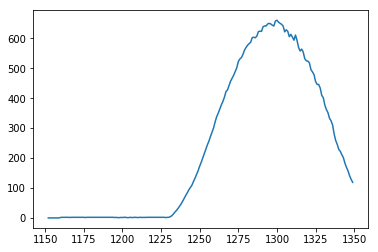

In [148]:
plt.plot(X[1152:1350])
plt.show()

In [149]:
X.to_csv("data_inp.csv")

In [150]:
y1 = y_np.iloc[1152:2305 , :]
X1 = X.iloc[1152:2305 , :]
X2 = X.iloc[2304:2593,:]
y2 = y_np.iloc[2304:2593,:]


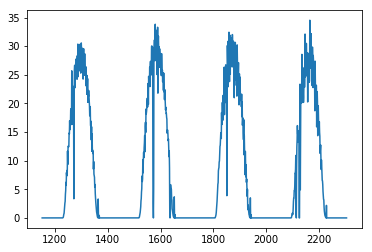

In [151]:
plt.plot(y1)

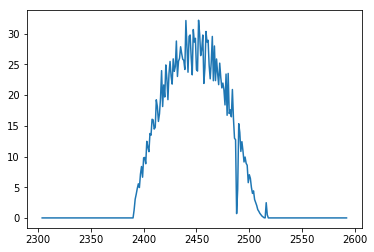

In [152]:
plt.plot(y2)

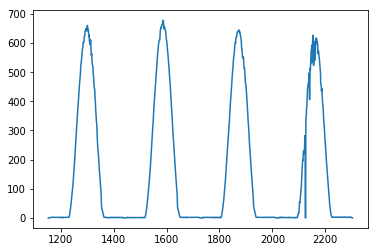

In [153]:
plt.plot(X1)

In [154]:
X2.describe()

,0
count,289.000000
mean,147.884429
std,211.158370
min,0.000000
25%,2.000000
50%,2.400000
75%,292.600000
max,598.400000


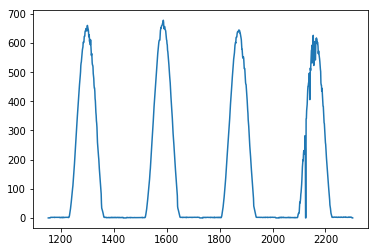

In [155]:
plt.plot(X[1152:2304])

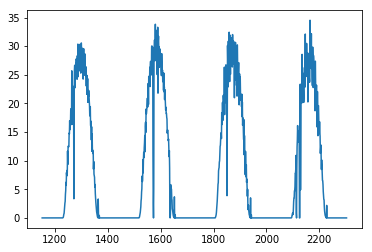

In [156]:
plt.plot(y_np[1152:2304])

In [157]:
X2=X.iloc[2304:2593]

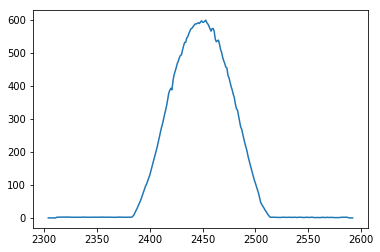

In [158]:
plt.plot(X2)

In [159]:
X2.shape

(289, 1)

In [160]:
y2.to_csv("y_2_test_solar_power_generation.csv")
y1.to_csv("y_1_test_solar_power_generation.csv")
X2.to_csv("X_2_test_solar_power_generation.csv")
X1.to_csv("X_1_test_solar_power_generation.csv")

In [161]:
y2=y_np.iloc[2304:2593]

In [162]:
yfile=pd.read_csv("11MW-GenerationFile-5Min.csv",header=None)

In [163]:
yfile=yfile.iloc[:,4].values




In [164]:
yfile

array([ 0.        ,  0.08333333,  0.16666667, ..., 23.75      ,
       23.83333333, 23.91666667])

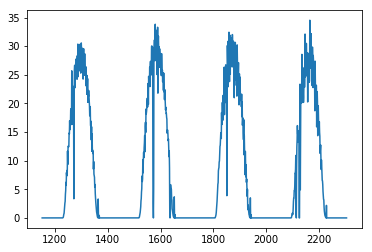

In [165]:
plt.plot(y1)
plt.show()

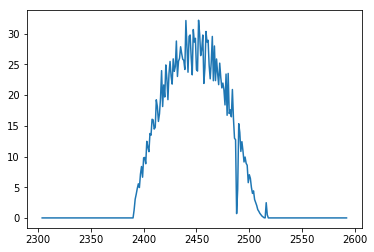

In [166]:
plt.plot(y2)
plt.show()

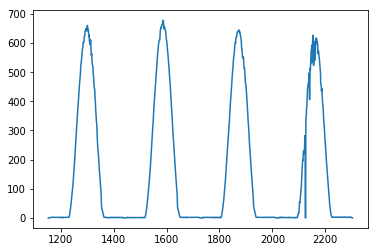

In [167]:
plt.plot(X1)
plt.show()

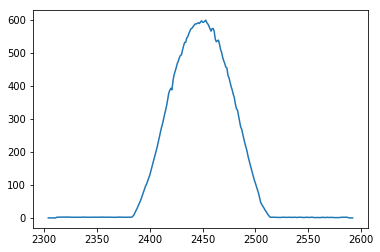

In [168]:
plt.plot(X2)
plt.show()

In [169]:
X1.shape

(1153, 1)

In [171]:
X1

,0
1152,0.0
1153,0.0
1154,0.0
1155,0.0
1156,0.0
1157,0.0
1158,0.0
1159,0.0
1160,1.6
1161,2.0


In [172]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set = sc.fit_transform(X1)
test = sc.transform(X2)

In [173]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_y = sc.fit_transform(y1)
test_y = sc.transform(y2)

In [291]:
training_set

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [292]:
max(training_set)

array([1.])

In [293]:
training_set.shape

(1153, 1)

In [294]:
training_set_y.shape

(1153, 1)

In [295]:
test_y.shape

(289, 1)

In [296]:
test.shape

(289, 1)

In [297]:
y1.shape

(104544, 1)

In [298]:
test = sc.transform(X2)

In [299]:
#1
X_test = x2[:-1]
y_test = x2[1:]

In [300]:
#2
X_train=x1[:-1]
y_train=x2[1:]

In [301]:
#3
X_train=np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))

In [302]:
X_train.shape

(1152, 1, 1)

In [304]:
#4
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [305]:
regressor=Sequential()

In [306]:
#adding input layer and lstm layer
regressor.add(LSTM(units=4, activation = "sigmoid" ,input_shape=(None , 1)))





In [307]:
regressor.add(Dense(units=1))

In [308]:
regressor.compile(optimizer ="adam",loss="mean_squared_error")

In [310]:
regressor.fit(X_train,y_train,batch_size=2,epochs = 300)

Epoch 1/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4446e-04
Epoch 2/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4805e-04
Epoch 3/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.5158e-04
Epoch 4/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.5668e-04
Epoch 5/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.5504e-04
Epoch 6/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4587e-04
Epoch 7/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4821e-04
Epoch 8/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4856e-04
Epoch 9/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4042e-04
Epoch 10/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4247e-04
Epoch 11/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.5230e-04
Epoch 12/300
1152/1152 [======

1152/1152 [==============================] - 1s 1ms/step - loss: 5.3922e-04
Epoch 93/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4877e-04
Epoch 94/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4333e-04
Epoch 95/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.5000e-04
Epoch 96/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4762e-04
Epoch 97/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4495e-04
Epoch 98/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4384e-04
Epoch 99/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4777e-04
Epoch 100/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.5727e-04
Epoch 101/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.5212e-04
Epoch 102/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.5213e-04
Epoch 103/300
1152/1152 [======

1152/1152 [==============================] - 1s 1ms/step - loss: 5.5256e-04
Epoch 184/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4452e-04
Epoch 185/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.5748e-04
Epoch 186/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.5444e-04
Epoch 187/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.3987e-04
Epoch 188/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4869e-04
Epoch 189/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4431e-04
Epoch 190/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4539e-04
Epoch 191/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.5236e-04
Epoch 192/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.5265e-04
Epoch 193/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4967e-04
Epoch 194/300
1152/1152 

1152/1152 [==============================] - 1s 1ms/step - loss: 5.4582e-04
Epoch 275/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4384e-04
Epoch 276/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.3999e-04
Epoch 277/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4515e-04
Epoch 278/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.5042e-04
Epoch 279/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4401e-04
Epoch 280/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4684e-04
Epoch 281/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4836e-04
Epoch 282/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4121e-04
Epoch 283/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4548e-04
Epoch 284/300
1152/1152 [==============================] - 1s 1ms/step - loss: 5.4492e-04
Epoch 285/300
1152/1152 

In [312]:
#5
X_test=np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [311]:
#6
from keras.models import load_model

regressor.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
  # deletes the existing model

# returns a compiled model
# identical to the previous one
#7
model = load_model('my_model.h5')

In [313]:
#8
y_pred = model.predict(X_test)

In [314]:

y_pred =sc.inverse_transform(y_pred)

In [315]:
y_pred

array([[2.2564402],
       [2.2564402],
       [2.2564402],
       [2.2564402],
       [2.2564402],
       [2.2564402],
       [2.2564402],
       [2.2564402],
       [2.2595427],
       [2.2593002],
       [2.2593002],
       [2.2600784],
       [2.2595427],
       [2.2598257],
       [2.2600784],
       [2.2598257],
       [2.2600784],
       [2.2593002],
       [2.2606342],
       [2.2598257],
       [2.2598257],
       [2.2598257],
       [2.2593002],
       [2.2593002],
       [2.2593002],
       [2.2593002],
       [2.2593002],
       [2.2593002],
       [2.2593002],
       [2.2593002],
       [2.2593002],
       [2.2593002],
       [2.2593002],
       [2.2603614],
       [2.2598257],
       [2.2593002],
       [2.2593002],
       [2.2593002],
       [2.2593002],
       [2.2593002],
       [2.2593002],
       [2.2593002],
       [2.2593002],
       [2.2593002],
       [2.2598257],
       [2.2593002],
       [2.2593002],
       [2.2593002],
       [2.2593002],
       [2.2595427],


In [316]:
y_test=sc.inverse_transform(y_test)

In [317]:
y_test

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [3.24388086e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [3.83367738e-03],
       [3.24388086e-03],
       [3.53877912e-03],
       [3.83367738e-03],
       [3.53877912e-03],
       [3.83367738e-03],
       [2.94898260e-03],
       [4.42347390e-03],
       [3.53877912e-03],
       [3.53877912e-03],
       [3.53877912e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [4.12857564e-03],
       [3.53877912e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],


In [318]:
y_test = test[1:]

In [319]:
y_test=

SyntaxError: invalid syntax (<ipython-input-319-428eb83e7194>, line 1)

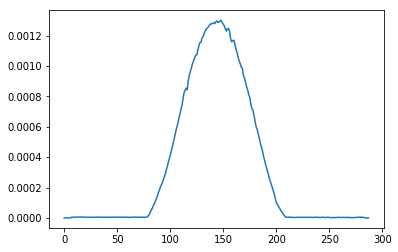

In [320]:
plt.plot(y_test)
plt.show()

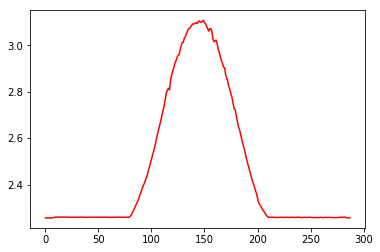

In [321]:
plt.plot(y_pred ,color = "red")
plt.show()

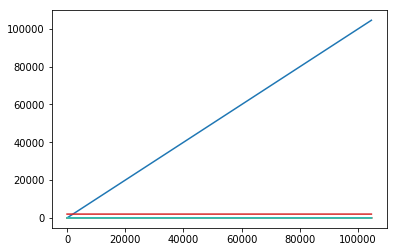

In [202]:
plt.plot(y)

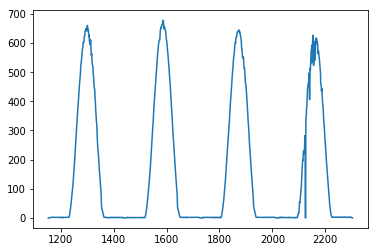

In [203]:
plt.plot(X1)

In [322]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.wrappers.scikit_learn import KerasRegressor 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD

In [337]:
model = Sequential() 
model.add(Dense(1, input_dim=1, init= "normal" , activation= "relu" ))
model.add(Dense(1, init= "normal"))
sgd = SGD(lr=0.10, momentum=0.95, decay=0.0, nesterov=False) 
model.compile(loss= "mean_squared_error" , optimizer=sgd, metrics=[ "accuracy" ]) 
    

C:\Users\ANEESRAZA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, input_dim=1, activation="relu", kernel_initializer="normal")`
  
C:\Users\ANEESRAZA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [338]:
model.fit(x1,y1)

ValueError: Input arrays should have the same number of samples as target arrays. Found 17568 input samples and 104544 target samples.

In [339]:
X1=X1.values
y=y.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [340]:
y

,0,1,2,3,4,5,6,7,8,9
0,NaN,1,11,2014,0.000000,0.1,0.2,0.3,0.4,0.5
1,0.0,1,11,2014,0.083333,0.0,0.0,0.0,0.0,0.0
2,1.0,1,11,2014,0.166667,0.0,0.0,0.0,0.0,0.0
3,2.0,1,11,2014,0.250000,0.0,0.0,0.0,0.0,0.0
4,3.0,1,11,2014,0.333333,0.0,0.0,0.0,0.0,0.0
5,4.0,1,11,2014,0.416667,0.0,0.0,0.0,0.0,0.0
6,5.0,1,11,2014,0.500000,0.0,0.0,0.0,0.0,0.0
7,6.0,1,11,2014,0.583333,0.0,0.0,0.0,0.0,0.0
8,7.0,1,11,2014,0.666667,0.0,0.0,0.0,0.0,0.0
9,8.0,1,11,2014,0.750000,0.0,0.0,0.0,0.0,0.0


In [341]:
X1

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

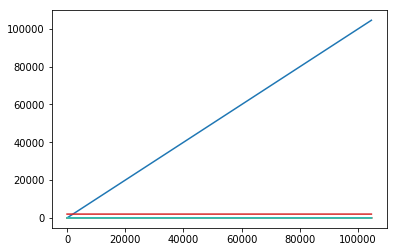

In [342]:
plt.plot(y)

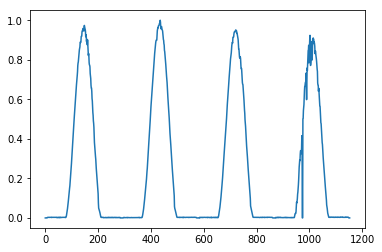

In [343]:
plt.plot(X1)

In [344]:
X1 = sc.fit_transform(X1)
y =sc.transform(y)

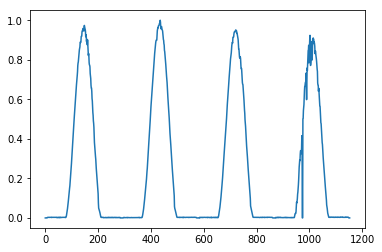

In [345]:
plt.plot(X1)

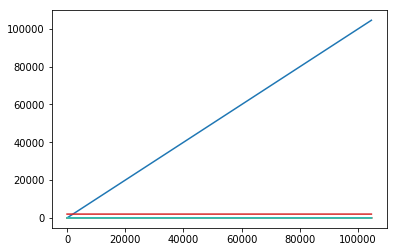

In [346]:
plt.plot(y)

In [347]:
model.fit(training_set,training_set_y ,nb_epoch=200, batch_size=1, verbose=2) 

C:\Users\ANEESRAZA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/200
 - 1s - loss: 0.3038 - acc: 0.3695
Epoch 2/200
 - 1s - loss: 0.3120 - acc: 0.3747
Epoch 3/200
 - 1s - loss: 0.2909 - acc: 0.3426
Epoch 4/200
 - 1s - loss: 0.3623 - acc: 0.3270
Epoch 5/200
 - 1s - loss: 0.2980 - acc: 0.3556
Epoch 6/200
 - 1s - loss: 0.3228 - acc: 0.3660
Epoch 7/200
 - 1s - loss: 0.3909 - acc: 0.3105
Epoch 8/200
 - 1s - loss: 0.2857 - acc: 0.3703
Epoch 9/200
 - 1s - loss: 0.2564 - acc: 0.3894
Epoch 10/200
 - 1s - loss: 0.3309 - acc: 0.3530
Epoch 11/200
 - 1s - loss: 0.3631 - acc: 0.3339
Epoch 12/200
 - 1s - loss: 0.3159 - acc: 0.3426
Epoch 13/200
 - 1s - loss: 0.3175 - acc: 0.3313
Epoch 14/200
 - 1s - loss: 0.3532 - acc: 0.3270
Epoch 15/200
 - 1s - loss: 0.3602 - acc: 0.3382
Epoch 16/200
 - 1s - loss: 0.3259 - acc: 0.3278
Epoch 17/200
 - 1s - loss: 0.4537 - acc: 0.3157
Epoch 18/200
 - 1s - loss: 0.3033 - acc: 0.3547
Epoch 19/200
 - 1s - loss: 0.2772 - acc: 0.3582
Epoch 20/200
 - 1s - loss: 0.2966 - acc: 0.3513
Epoch 21/200
 - 1s - loss: 0.3402 - acc: 0.3296
E

Epoch 171/200
 - 1s - loss: 0.2503 - acc: 0.3816
Epoch 172/200
 - 1s - loss: 0.3457 - acc: 0.3426
Epoch 173/200
 - 1s - loss: 0.3349 - acc: 0.3452
Epoch 174/200
 - 1s - loss: 0.3497 - acc: 0.3495
Epoch 175/200
 - 1s - loss: 0.2760 - acc: 0.3382
Epoch 176/200
 - 1s - loss: 0.3649 - acc: 0.3244
Epoch 177/200
 - 1s - loss: 0.2923 - acc: 0.3738
Epoch 178/200
 - 1s - loss: 0.3373 - acc: 0.3348
Epoch 179/200
 - 1s - loss: 0.2998 - acc: 0.3521
Epoch 180/200
 - 1s - loss: 0.2846 - acc: 0.3703
Epoch 181/200
 - 1s - loss: 0.2874 - acc: 0.3513
Epoch 182/200
 - 1s - loss: 0.3475 - acc: 0.3365
Epoch 183/200
 - 1s - loss: 0.2818 - acc: 0.3634
Epoch 184/200
 - 1s - loss: 0.3808 - acc: 0.3200
Epoch 185/200
 - 1s - loss: 0.3329 - acc: 0.3270
Epoch 186/200
 - 1s - loss: 0.3879 - acc: 0.3157
Epoch 187/200
 - 1s - loss: 0.3307 - acc: 0.3287
Epoch 188/200
 - 1s - loss: 0.2590 - acc: 0.3894
Epoch 189/200
 - 1s - loss: 0.3582 - acc: 0.3469
Epoch 190/200
 - 1s - loss: 0.2798 - acc: 0.3738
Epoch 191/200
 - 1s 

In [ ]:
X2=X2.values

In [329]:
model.save("ann.h5")

In [331]:
model=load_model("ann.h5")

In [333]:
y_pred = model.predict(test)

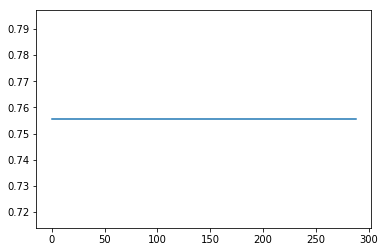

In [335]:
plt.plot(y_pred)
plt.show()

In [327]:
y1.shape

(104544, 1)

In [215]:
X2=sc.transform(X2)

In [216]:
X2

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [3.24388086e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [3.83367738e-03],
       [3.24388086e-03],
       [3.53877912e-03],
       [3.83367738e-03],
       [3.53877912e-03],
       [3.83367738e-03],
       [2.94898260e-03],
       [4.42347390e-03],
       [3.53877912e-03],
       [3.53877912e-03],
       [3.53877912e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [4.12857564e-03],
       [3.53877912e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],


In [217]:
y_solar=model.predict(X2)

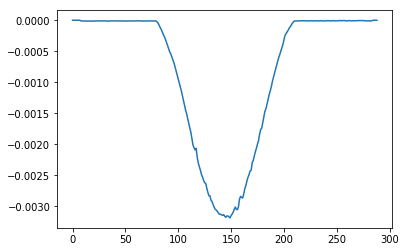

In [218]:
plt.plot(y_solar)

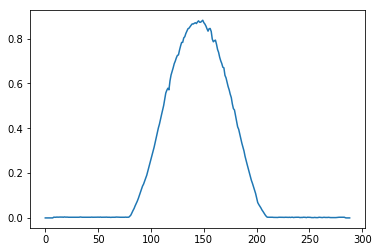

In [220]:
plt.plot(X2)

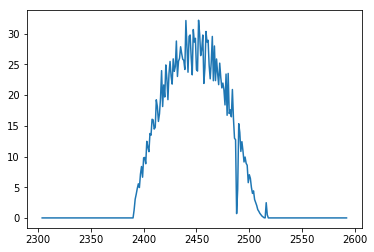

In [221]:
plt.plot(y2)

In [222]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR 
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.metrics import mean_squared_error


In [223]:
num_folds = 10 
seed = 7 
scoring = 'neg_mean_squared_error'


In [224]:
models = [] 
models.append(('LR', LinearRegression())) 
models.append(('LASSO', Lasso())) 
models.append(('EN', ElasticNet())) 
models.append(('KNN', KNeighborsRegressor())) 
models.append(('CART', DecisionTreeRegressor())) 
{"LR":[eroor of lr,accuracy of lr]}
l= [lr(),knn()]
l1=[]
d={}
for i in l:
    j,k=i
    l1=list(j,k)
    d['i']=l1

In [225]:
results = [] 
names = [] 
for name, model in models: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X1, y, cv=kfold, scoring=scoring) 
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

ValueError: Found input variables with inconsistent numbers of samples: [1153, 104544]

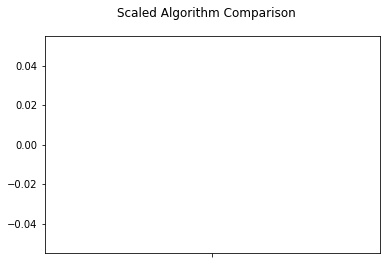

In [226]:
# Compare Algorithms 
fig = plt.figure() 
fig.suptitle('Scaled Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

In [227]:
knc=KNeighborsRegressor(n_neighbors=25,metric="minkowski",p=2)
knc.fit(X1,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [228]:
y_solark=knc.predict(y_pred)

NotFittedError: This KNeighborsRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [229]:
knc.score(X1,y)

NotFittedError: This KNeighborsRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [230]:
y_solark=sc.inverse_transform(y_solark)

NameError: name 'y_solark' is not defined

In [231]:
plt.plot(y_solark)
plt.plot(y2)

NameError: name 'y_solark' is not defined

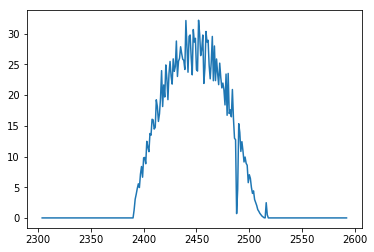

In [232]:
plt.plot(y2)

In [233]:
y_solark=sc.inverse_transform(y_solark)

NameError: name 'y_solark' is not defined

NameError: name 'y_solark' is not defined

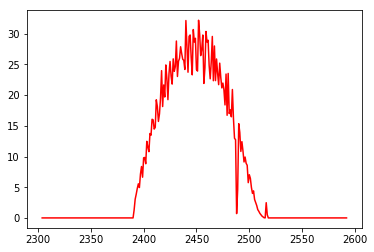

In [234]:
plt.plot(y2,color="red")
plt.plot(y_solark)

In [235]:
y2=y2.values

In [236]:
knc.score(X2,sc.transform(y2))

NotFittedError: This KNeighborsRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [237]:
rfr=GradientBoostingRegressor(n_estimators=50)

In [238]:
rfr.fit(X1,y)

ValueError: bad input shape (104544, 10)

In [239]:
rfr.score(X1,y)

NotFittedError: This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [240]:
rfr.score(X2,sc.transform(y2))

NotFittedError: This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [241]:
y_solarr=rfr.predict(y_pred)

NotFittedError: This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [242]:
plt.plot(y_solarr)
plt.plot(sc.transform(y2),color="red" )
plt.show()

NameError: name 'y_solarr' is not defined

In [243]:
ensembles = [] 
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())]))) 
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())]))) 
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())]))) 
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))



In [244]:
results = [] 
names = [] 
for name, model in ensembles: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X1, y, cv=kfold, scoring=scoring) 
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

ValueError: Found input variables with inconsistent numbers of samples: [1153, 104544]

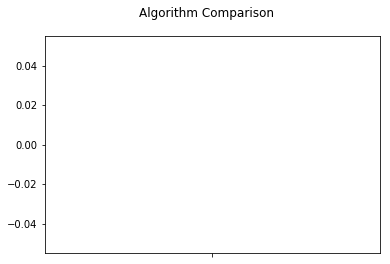

In [245]:
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

In [246]:
param_grid = dict(n_estimators=np.array([5,10,15,20,50])) 
model = GradientBoostingRegressor(random_state=seed) 
kfold = KFold(n_splits=num_folds, random_state=seed) 
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold) 
grid_result = grid.fit(X1, y)

ValueError: Found input variables with inconsistent numbers of samples: [1153, 104544]

In [247]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params'] 
for mean, stdev, param in zip(means, stds, params): 
    print("%f (%f) with: %r" % (mean, stdev, param))

NameError: name 'grid_result' is not defined

In [248]:
y_pred

array([[ 0.05660273],
       [ 0.05660273],
       [ 0.05660273],
       [ 0.05660273],
       [ 0.05660273],
       [ 0.05660273],
       [ 0.05660273],
       [ 0.05660273],
       [ 2.3260002 ],
       [ 2.1201298 ],
       [ 2.1201298 ],
       [ 2.7374797 ],
       [ 2.3260002 ],
       [ 2.5317822 ],
       [ 2.7374797 ],
       [ 2.5317822 ],
       [ 2.7374797 ],
       [ 2.1201298 ],
       [ 3.148605  ],
       [ 2.5317822 ],
       [ 2.5317822 ],
       [ 2.5317822 ],
       [ 2.1201298 ],
       [ 2.1201298 ],
       [ 2.1201298 ],
       [ 2.1201298 ],
       [ 2.1201298 ],
       [ 2.1201298 ],
       [ 2.1201298 ],
       [ 2.1201298 ],
       [ 2.1201298 ],
       [ 2.1201298 ],
       [ 2.1201298 ],
       [ 2.943091  ],
       [ 2.5317822 ],
       [ 2.1201298 ],
       [ 2.1201298 ],
       [ 2.1201298 ],
       [ 2.1201298 ],
       [ 2.1201298 ],
       [ 2.1201298 ],
       [ 2.1201298 ],
       [ 2.1201298 ],
       [ 2.1201298 ],
       [ 2.5317822 ],
       [ 2

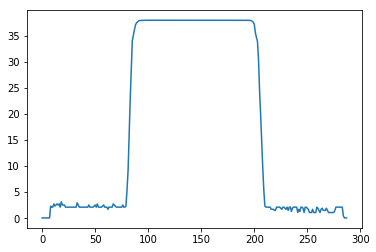

In [249]:
plt.plot(y_pred)

In [250]:
X2

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [3.24388086e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [3.83367738e-03],
       [3.24388086e-03],
       [3.53877912e-03],
       [3.83367738e-03],
       [3.53877912e-03],
       [3.83367738e-03],
       [2.94898260e-03],
       [4.42347390e-03],
       [3.53877912e-03],
       [3.53877912e-03],
       [3.53877912e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [4.12857564e-03],
       [3.53877912e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],
       [2.94898260e-03],


In [251]:
y_pred=sc.transform(y_pred)

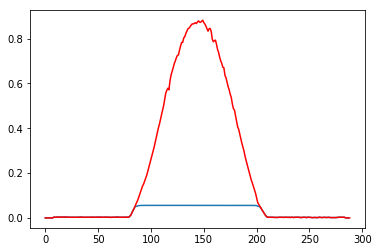

In [252]:
plt.plot(y_pred)
plt.plot(X2,color="red")

In [253]:
y.shape()

TypeError: 'tuple' object is not callable

In [254]:
data = pd.read_csv("data1.csv")
x = data.iloc[:, 1]
y = data.iloc[:, 2]
train_size = int(len(x) * 0.80)
x1, x2 = x[0:train_size], x[train_size:]
y1, y2 = y[0:train_size], y[train_size:]

In [255]:
x1 = pd.DataFrame(x1)
x2 = pd.DataFrame(x2)
y1 = pd.DataFrame(y1)
y2 = pd.DataFrame(y2)

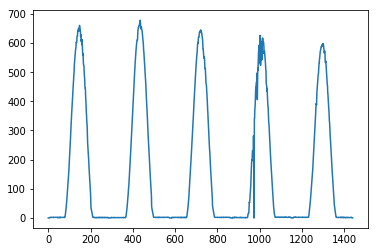

In [256]:
plt.plot(x)

In [257]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
x1 = sc.fit_transform(x1)
x2 = sc.transform(x2)

In [258]:
def LR(training_set,test,training_set_y,test_y):
    model = LinearRegression()
    model.fit(training_set,training_set_y)
    y_pred = model.predict(test)
    error = mean_squared_error(test_y,y_pred)
    
    return y_pred,error
    
    

In [259]:
y_pred,error = LR(training_set,test,training_set_y,test_y)

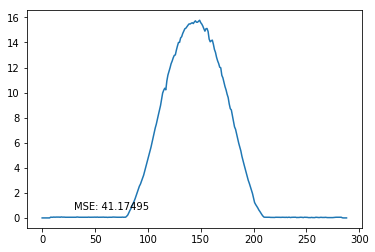

In [260]:
plt.plot(y_pred)
plt.text(30,0.65,"MSE: "+str(round(error,6)))
plt.show()

In [261]:
print(error)

41.17495010297838


In [262]:
round(error,6)

41.17495

In [263]:
def Lasso1():
    global x1,x2,y1,y2
    model = Lasso()
    name="Lasso Regression"
    plotgraph(model,name)

In [264]:
y_pred,error,score = La(training_set,test,training_set_y,test_y)

ValueError: not enough values to unpack (expected 3, got 2)

In [265]:
def plotgraph(model,name):
    model.fit(x1, y1)
    y_pred = model.predict(x2)
    error = mean_squared_error(y2, y_pred)
    score = model.score(y_pred, y2)
    plt.plot(y_pred)
    plt.title("Result of " + name)
    plt.xlabel("Time")
    plt.ylabel("Solar Power generation")
    plt.text(30, 0.65, "MSE: " + str(round(error, 6)))
    plt.text(30, 0.75, "Score: " + str(round(score, 3)))
    plt.show()

In [286]:
def La(training_set,test,training_set_y,test_y):
    model = KNeighborsRegressor(k=10)
    model.fit(training_set,training_set_y)
    y_pred = model.predict(test)
    error = mean_squared_error(test_y,y_pred)
    joblib.dump(model, 'knn.pkl') 
    
    return y_pred,error
    
    

In [287]:
y_pred,error = La(training_set,test,training_set_y,test_y)

TypeError: __init__() got an unexpected keyword argument 'k'

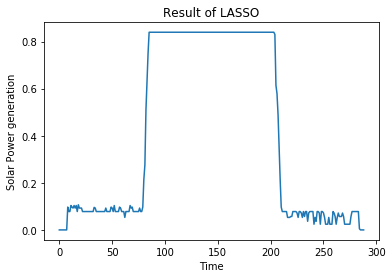

In [285]:
plt.plot(y_pred)
plt.title("Result of " + "LASSO")
plt.xlabel("Time")
plt.ylabel("Solar Power generation")
plt.show()

In [277]:
print(error)

0.09289051518778194


In [278]:
training_set

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [280]:

from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
# Load the model from the file 
lasso_from_joblib = joblib.load('lasso.pkl')  
  
# Use the loaded model to make predictions 
y_pre = lasso_from_joblib.predict(test) 


In [271]:
 from sklearn.externals import joblib 

In [350]:
dict1={}
dict1["adad"]=12
dict1["asdqweq"]=231

In [354]:
for i in dict1:
    print(dict1[i])

12
231


In [375]:
def yaya():
    print("yaya")
    
def lolo():
    print("lolo")
    
    
dict1={}
a=lolo()
dict1[1]=[1,a]
dict1[2]=[2,yaya()]
'''
for i in dict1:
    t=dict1[i]
    if(i == 1):
        a=T[1]
'''
     


lolo
yaya


'\nfor i in dict1:\n    t=dict1[i]\n    if(i == 1):\n        a=T[1]\n'